# Project 1 : Discrete & Continuous Distributions
### Author: Ishan Mohanty
### USC ID: 4461-3447-18
### NET ID: imohanty
### Email: imohanty@usc.edu
### /###################################################################################/

In [18]:
'''
####################################################
EE 511 : Simulation Methods of Stochastic Systems
Author: Ishan Mohanty
USC ID: 4461-3447-18
NET ID: imohanty
Email: imohanty@usc.edu
####################################################
'''

#import libraries

import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
"""
Generate Bernoulli trial outputs from uniform random variable samples.
@param n: number of trials
       p: threshold probability
@return bern: output bernoulli samples which are either 0 or 1.  
"""
def sim_bern_trials(n,p):
    u = np.random.uniform(0,1,n)
    bern = np.zeros(u.shape)
    for i in range(n):
        if u[i] > p:
            bern[i] = 1
        else:
            bern[i] = 0
    return bern

In [20]:
"""
Generate histogram plot for different distributions.
@param trials: information regarding distribution
       b: number of bins
       xlabel: x-axis label
       y label: y-axis label
       title: plot title
       xticks: numbers representing points on x-axis of histogram
       ticks_flag: if xticks is needed or not
       range_val: range of histogram
@return bern: output bernoulli samples which are either 0 or 1.  
"""
def histogram_plot(trials,b,xlabel,ylabel,title,xticks,ticks_flag,range_val):
    sns.set()
    plt.hist(trials,bins=b,range=range_val)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if ticks_flag == 1:
        plt.xticks(xticks)
    plt.show()

## Q1: A Few Coins

### Experiment 1.1:  Write a routine to simulate a fair Bernoulli trial. Generate a histogram for 100 simulated Bernoulli trials.

### Histogram plot for the experiment

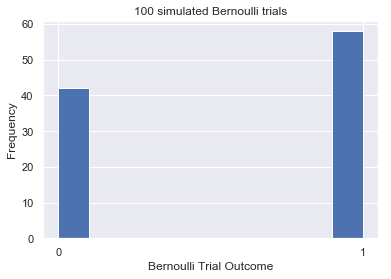

In [21]:
NUM_TRIALS = 100

bern_trials = sim_bern_trials(NUM_TRIALS,0.5)

b = (int)(NUM_TRIALS/10)
xlabel = 'Bernoulli Trial Outcome'
ylabel = 'Frequency'
title = '100 simulated Bernoulli trials' 
xticks = (0,1)

histogram_plot(bern_trials,b,xlabel,ylabel,title,xticks,1,None)

### Summary:

1. The bernoulli trials were simulated using the uniform distribution with U[ val > 0.5 ] resulting in a 1 or  
   success and U[ val <= 0.5 ] resulting in a 0 or failure.
2. 100 such bernoulli trials were simulated and the histogram was plotted for the same.

### Results:

1. From the plots we observe that, We get different results everytime we run the simulation but on an average we
   see that the number of successes and number of failures is roughly about 50% of the number of simulations i.e 
   around 50 out of 100 trials. This is due to the fact that the trials are fair and hence on an average have a 
   probability of 0.5 of occurrence, which is equally likely.
2. The Histogram displays a bernoulli distribution.

### Experiment 1.2: Write a routine to count the number of successes in 7 fair Bernoulli trials. Generate a histogram for 100 samples of this success-counting random variable.

### Histogram plot for the experiment

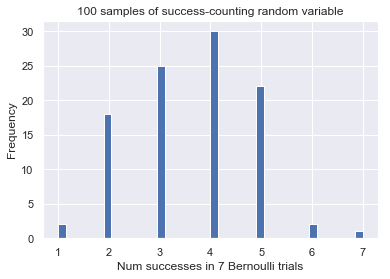

In [22]:
NUM_RUNS = 100
NUM_TRIALS = 7

# 1 is a heads or success and 0 is a tails or failure
count_rv = np.zeros(NUM_RUNS)
for i in range(NUM_RUNS):
    bern_trials = sim_bern_trials(NUM_TRIALS,0.5)
    count_rv[i] = np.sum(bern_trials)
    
xlabel='Num successes in 7 Bernoulli trials'
ylabel='Frequency'
title='100 samples of success-counting random variable'

histogram_plot(count_rv,40,xlabel,ylabel,title,None,0,None)

### Summary:
1. The bernoulli trials were simulated using the uniform distribution with U[ val > 0.5 ] resulting in a 1 or  
   success and U[ val <= 0.5 ] resulting in a 0 or failure.
2. 7 such fair bernoulli trials were simulated and the number of successes or number of 1's were stored.
3. This was repeated for 100 runs and the histogram for the number of successes in 7 fair bernoulli trials run over 
   100 times was plotted.
   
### Results:
1. We observe from the plots,That this binomial distribution of the successes of 7 fair bernoulli trials when
   repeated for a large amount of iterations which in our case has the shape of a normal gaussian distribution 
   courtesy of the central limit theorem.
2. Therefore, the histogram displays a normal distribution.

### Experiment 1.3: Write a routine to count the longest run of heads in 100 Bernoulli samples. Generate a histogram for this random variable.

### Histogram plot for the experiment

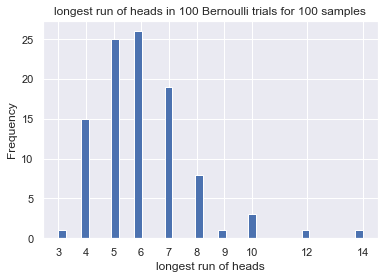

In [23]:
NUM_RUNS = 100
NUM_TRIALS = 100

samples = np.zeros(NUM_RUNS)

for i in range(NUM_RUNS):
    
    tally=1
    lng_run=1
    bern_trials = sim_bern_trials(NUM_TRIALS,0.5)
    
    for j in range(NUM_TRIALS-1):
        
        if bern_trials[j]==1 and bern_trials[j+1]==1:
            tally+=1
            if tally > lng_run:
                lng_run = tally
        else:
            tally=1
            
        if j == NUM_TRIALS-2:  
            samples[i] = lng_run         

unique_lng = np.unique(samples)

xlabel='longest run of heads'
ylabel='Frequency'
title='longest run of heads in 100 Bernoulli trials for 100 samples'
xticks=unique_lng 

histogram_plot(samples,40,xlabel,ylabel,title,xticks,1,None)

### Summary:
1. The bernoulli trials were simulated using the uniform distribution with U[ val > 0.5 ] resulting in a 1 or  
   head and U[ val <= 0.5 ] resulting in a 0 or tail.
2. 100 such fair bernoulli trials were simulated and the longest number of heads was counted for each sample. we
   ran 100 such bernouli trials for 100 such samples i.e each sample had 100 bernoulli trials and there were 100
   such samples.
3. The histogram was plotted for these 100 samples containing 100 bernoulli trials each.

### Results:
1. We observe from the plots, that the the binomial distribution approximates to a poisson distribution due to the 
   fact that for very low probability and large number of runs, the binomial distribution behaves like a poisson 
   distribution. Here, the probability of getting the longest run of heads can be seen as 5 or 6 out of 100. which 
   is hardly a probability of 0.05 and the number of runs is 100. Hence, this becomes a poisson distribution with a
   lambda parameter equal to n*p = 5 approximately.
2. Therefore, the histogram displays a poisson distribution with a lambda paramter approximately equal to 5 over
   100 runs with each binomial distribution converging to the poisson distribution over 100.

## Q2: Counting Successes

### Experiment 2: Take your Bernoulli success-counting random variable (the binomial random variable). Generate and sum k=5 samples from this routine. Generate 300 such sums and histogram your results. Repeat for k={10, 30, 50}. Comment on the histograms you observe for the different values of k.

In [24]:
"""
Simulates Binomial sample outputs from Bernoulli trials
@param n: number Bernoulli of trials
       p: threshold probability
       num_runs: iteration count
"""
def binomial_success_rv(n,p,num_runs):
    count_rv = np.zeros(num_runs)
    for i in range(num_runs):
        binom_trials = sim_bern_trials(n,p)
        count_rv[i] = np.sum(binom_trials)
    sns.set()
    plt.hist(count_rv,50)
    plt.xlabel('Num successes in '+str(n)+' in trials')
    plt.ylabel('Frequency')
    plt.title(str(num_runs)+' samples of success-counting binomial random variable')
    unique_success = np.unique(count_rv)
    plt.xticks(unique_success)
    plt.show() 

### Histogram plots for the experiment

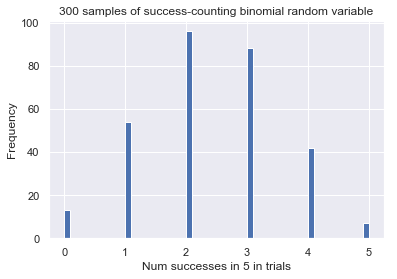

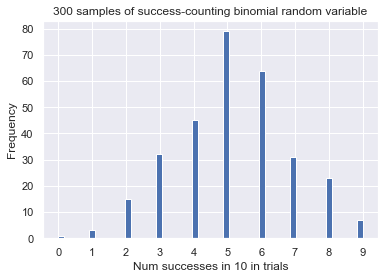

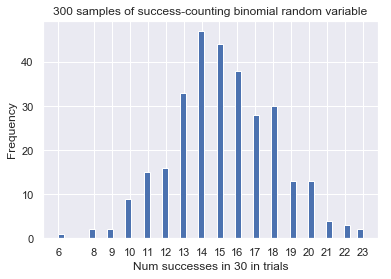

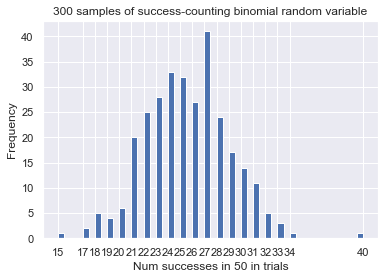

In [25]:
binomial_success_rv(5,0.5,300)
binomial_success_rv(10,0.5,300)
binomial_success_rv(30,0.5,300)
binomial_success_rv(50,0.5,300)

### Summary:
1. The bernoulli trials were simulated using the uniform distribution with U[ val > 0.5 ] resulting in a 1 or  
   success and U[ val <= 0.5 ] resulting in a 0 or failure.
2. k={5,10,30,50} such fair bernoulli trials were simulated and the number of successes or number of 1's were 
   stored.
3. This was repeated for 300 runs for each k={5,10,30,50} Bernoulli trials and the histogram for the number of 
   successes in k fair bernoulli trials run over 300 times was plotted.

### Results:
1. We observe that the binomial random variable takes the bell-shaped normal distribution curve for the 300 runs.
   It just gets to show that the normal distribution is an approximation of the binomial random variable. 
2. As the k bernoulli trials increase, the bell shape becomes more pronounced in the histogram. Hence, producing a
   more accurate normal distribution.

## Q3: Continuous Distributions

### Experiment 3: Use the inverse CDF method to generate 1000 samples of the X~exp(5) and Y~Cauchy(0,2). Generate histograms of the samples. Suggests other methods for testing goodness-of-fit.

In [26]:
"""
Generate samples from a particular distribution like Cauchy and exponential 
using Inverse CDF Transform method.
@param n: number of runs
       theta: expoenential parameter
       loc: Cauchy location paramter x0
       scale: Cauchy scaling parameter gamma
       rv: Type of random variable distribution example 'exp'
@return bern: output bernoulli samples which are either 0 or 1.  
"""
def inverse_cdf(n,theta,loc,scale,rv):
    u = np.random.uniform(0,1,n)
    x = np.zeros(n)
    for i in range(n):
        if rv == 'exp':
            x[i] = -1*theta*np.log(1-u[i])
        elif rv == 'cauchy':
            param = np.pi*((u[i]-0.5))
            x[i] = loc + scale*np.tan(param)
        else:
            print('Incorrect Distribution! Please Re-enter')
            break
    return x

### Histogram plots for the Experiment

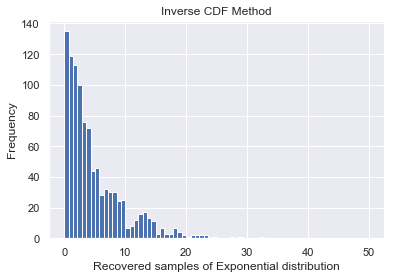

In [27]:
rv_exp = inverse_cdf(1000,5,0,2,'exp')

xlabel = 'Recovered samples of Exponential distribution'
ylabel = 'Frequency'
title = 'Inverse CDF Method'

histogram_plot(rv_exp,70,xlabel,ylabel,title,None,0,range_val=(0,50))

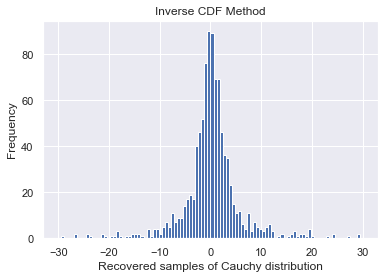

In [28]:
rv_cau = inverse_cdf(1000,5,0,2,'cauchy')

xlabel = 'Recovered samples of Cauchy distribution'
ylabel = 'Frequency'
title = 'Inverse CDF Method'

histogram_plot(rv_cau,100,xlabel,ylabel,title,None,0,range_val=(-30,30))

### Summary:
1. 1000 samples of the uniform random variable was generated.

2. Then we take the 1000 uniform random samples and apply the inverse of the CDF of exponential and cauchy 
   random variable, to get their respective distribution samples.
   
3. The formula for the inverse CDF of the exponential distribution is as follows,
   $F^{-1}$(U) = -$\theta$ ln(1-U) = X samples which belong to the exponential distribution.
   The formula for the inverse CDF of the Cauchy distribution is as follows,
   $F^{-1}$(U) = $\gamma$ tan( $\pi$ ( U-0.5 ) ) = X samples which belong to the Cauchy distribution.

### Results:
1. By the above formula and plots, we observe that we were able to get back samples of two distributions by 
   applying the inverse CDF transform technique on the uniform random variable samples.
2. The histogram of the first plot shows the exponential distribution with $\theta$ = 5, which decays with  
   increasing samples and the histogram of the second plot shows the samples from the Cauchy distribution which is
   located at 0 and scaled to a factor of 2.
3. Hence, we get back the samples from the respective ditributions using inverse CDF method.

### Q. Suggests other methods for testing goodness-of-fit.
Goodness of fit suggests how well the sampled data approximates to the actual distribution.
Apart from the histogram method, we can measure goodness-of-fit by Chi-squared goodness-of-fit
and Kolmogorov-Smirnov test.
1. Chi-squared goodness-of-fit:
   The equation is given by :
   $\sum_{m=1}^{k}$ ($O_m$ - $E_m$ )$^2$/$E_m$ = $\chi^2$ ~ $\chi^2$(k-1), where $O_m$ is the observed sample and
   $E_m$ is the expected sample. Used for a quantitative measure. Chi-squared gof is used for discrete 
   distributions like poisson and binomial distributions.
2. Kolmogorov-Smirnov test is used only in the case of continuous distributions.